In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set plot style
sns.set(style="whitegrid")

In [7]:
# Load datasets
customers = pd.read_csv("../data/Customers.csv")
products = pd.read_csv("../data/Products.csv")
transactions = pd.read_csv("../data/Transactions.csv")


In [8]:
# Display basic information about each dataset
print("Customers Dataset:")
print(customers.info())
print(customers.head())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [9]:
print("\nProducts Dataset:")
print(products.info())
print(products.head())


Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [10]:
print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())


Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P06

In [11]:
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")
print("\nMerged Dataset:")
print(merged_data.info())
print(merged_data.head())


Merged Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-2

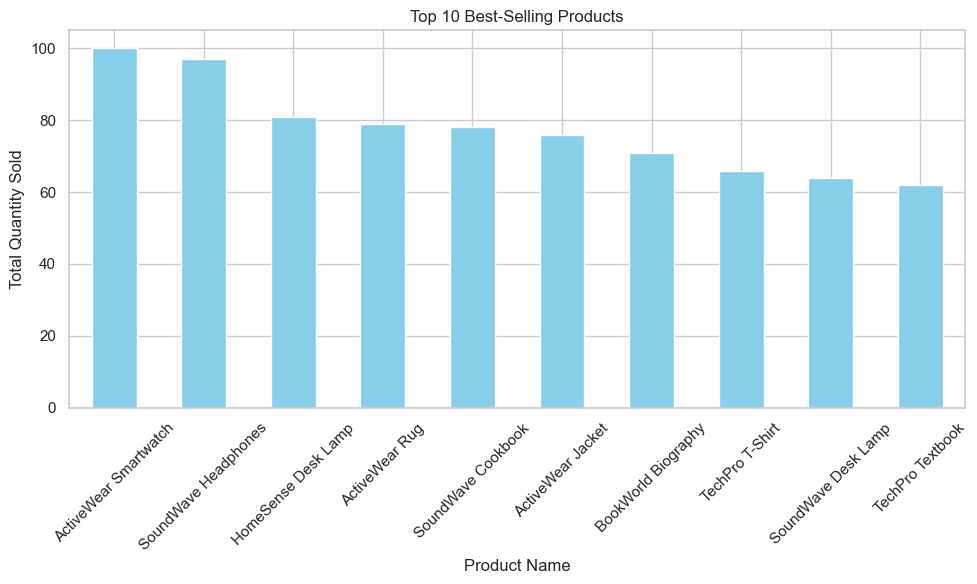

In [13]:
# EDA Section
# 1. Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/top_selling_products.png")  # Save plot
plt.show()


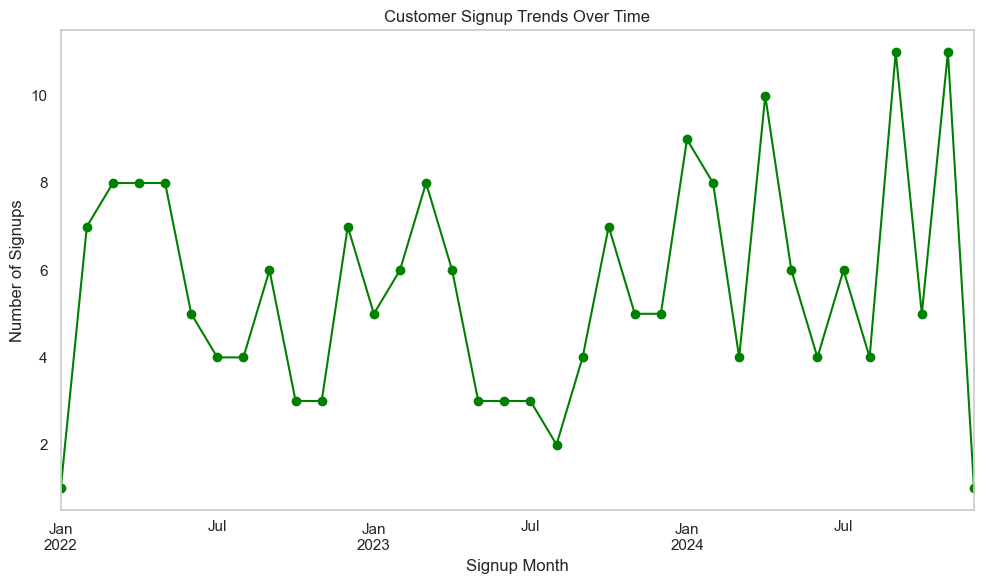

In [14]:
# 3. Customer signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
signup_trends.plot(marker='o', color='green')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.tight_layout()
plt.savefig("../outputs/signup_trends.png")  # Save plot
plt.show()

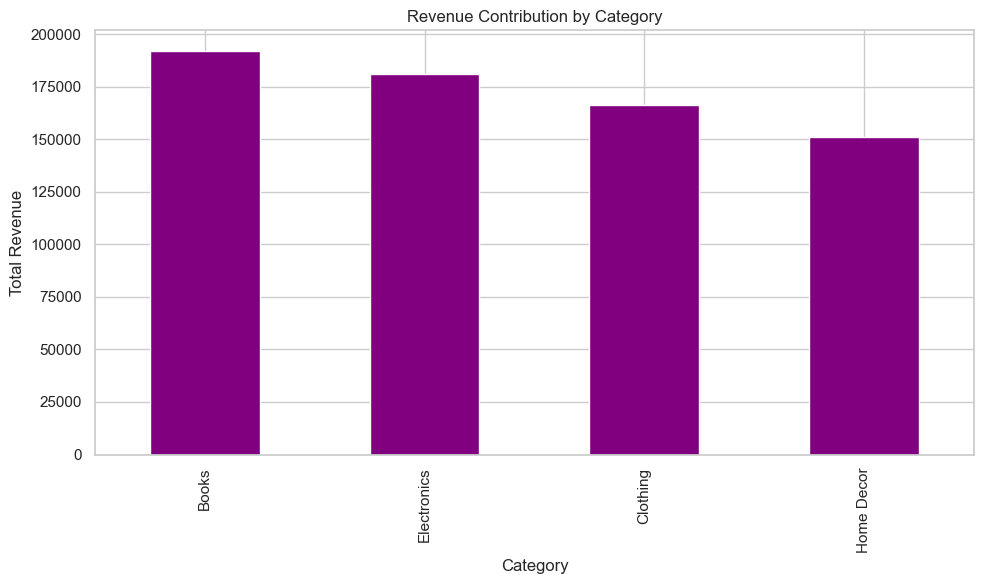

In [15]:
# 4. Top categories by revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='purple')
plt.title('Revenue Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig("../outputs/category_revenue.png")  # Save plot
plt.show()

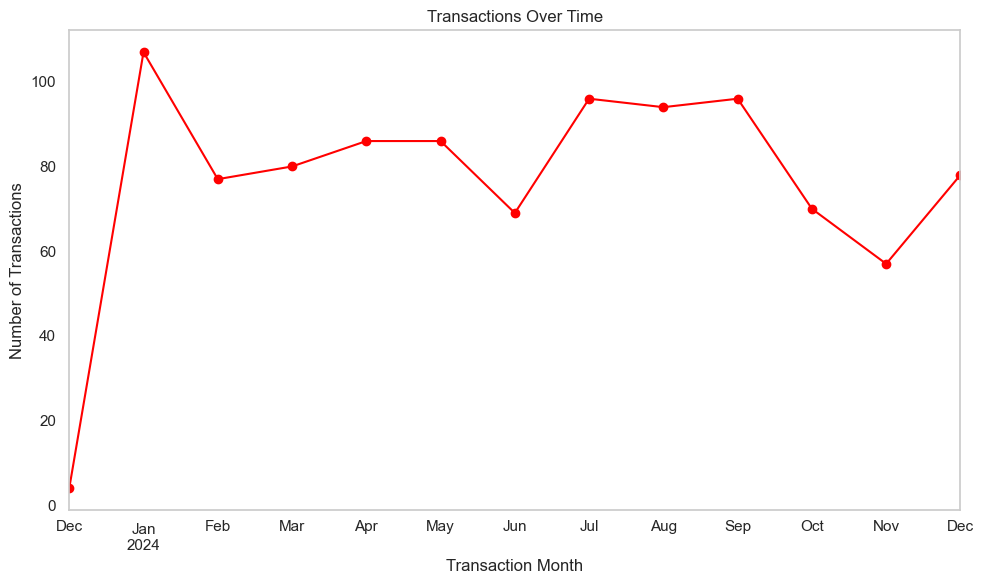

In [16]:
# 5. Total transactions over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
transactions_over_time.plot(marker='o', color='red')
plt.title('Transactions Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.tight_layout()
plt.savefig("../outputs/transactions_over_time.png")  # Save plot
plt.show()